In [2]:
import pandas as pd
import networkx as nx
import random
import matplotlib.pyplot as plt

In [3]:

# Load CSV (without header)
file_path = "Friendship_Graph_2022.csv"
df = pd.read_csv(file_path, header=None, dtype=str)  # Read as string to handle empty values

# Initialize an empty graph
G = nx.Graph()

# Iterate through each row to build the graph
for index, row in df.iterrows():
    node = int(row[0])  # First column is the main node
    neighbors = [int(n) for n in row[1:].dropna() if n.strip()]  # Convert non-empty values to integers
    
    # Add edges for each neighbor
    for neighbor in neighbors:
        G.add_edge(node, neighbor)
# Print all nodes
print("Nodes in the graph:")
print(list(G.nodes).index(629))
print(list(G.nodes))

Nodes in the graph:
43
[603, 605, 606, 607, 726, 709, 706, 609, 604, 626, 602, 608, 640, 621, 633, 628, 618, 617, 712, 713, 702, 703, 677, 710, 651, 649, 685, 624, 21609, 719, 720, 721, 722, 723, 724, 728, 714, 708, 662, 610, 616, 620, 632, 629, 611, 612, 614, 623, 636, 637, 634, 630, 631, 622, 635, 627, 639, 625, 673, 655, 701, 704, 732, 711, 729, 707, 717, 672, 718, 679, 656, 669, 660, 716, 727, 730, 200, 725, 648, 657, 645, 646, 705, 650, 653, 675, 678, 676, 665, 684, 668, 670, 661, 659, 681, 671, 666, 21634, 667, 682, 663, 664, 674, 686, 19679, 613, 619, 680]


In [4]:
# Print all nodes
print("Nodes in the graph:")
print(list(G.nodes))
G.remove_node(629)

Nodes in the graph:
[603, 605, 606, 607, 726, 709, 706, 609, 604, 626, 602, 608, 640, 621, 633, 628, 618, 617, 712, 713, 702, 703, 677, 710, 651, 649, 685, 624, 21609, 719, 720, 721, 722, 723, 724, 728, 714, 708, 662, 610, 616, 620, 632, 629, 611, 612, 614, 623, 636, 637, 634, 630, 631, 622, 635, 627, 639, 625, 673, 655, 701, 704, 732, 711, 729, 707, 717, 672, 718, 679, 656, 669, 660, 716, 727, 730, 200, 725, 648, 657, 645, 646, 705, 650, 653, 675, 678, 676, 665, 684, 668, 670, 661, 659, 681, 671, 666, 21634, 667, 682, 663, 664, 674, 686, 19679, 613, 619, 680]


In [5]:
print(list(G.nodes))

[603, 605, 606, 607, 726, 709, 706, 609, 604, 626, 602, 608, 640, 621, 633, 628, 618, 617, 712, 713, 702, 703, 677, 710, 651, 649, 685, 624, 21609, 719, 720, 721, 722, 723, 724, 728, 714, 708, 662, 610, 616, 620, 632, 611, 612, 614, 623, 636, 637, 634, 630, 631, 622, 635, 627, 639, 625, 673, 655, 701, 704, 732, 711, 729, 707, 717, 672, 718, 679, 656, 669, 660, 716, 727, 730, 200, 725, 648, 657, 645, 646, 705, 650, 653, 675, 678, 676, 665, 684, 668, 670, 661, 659, 681, 671, 666, 21634, 667, 682, 663, 664, 674, 686, 19679, 613, 619, 680]


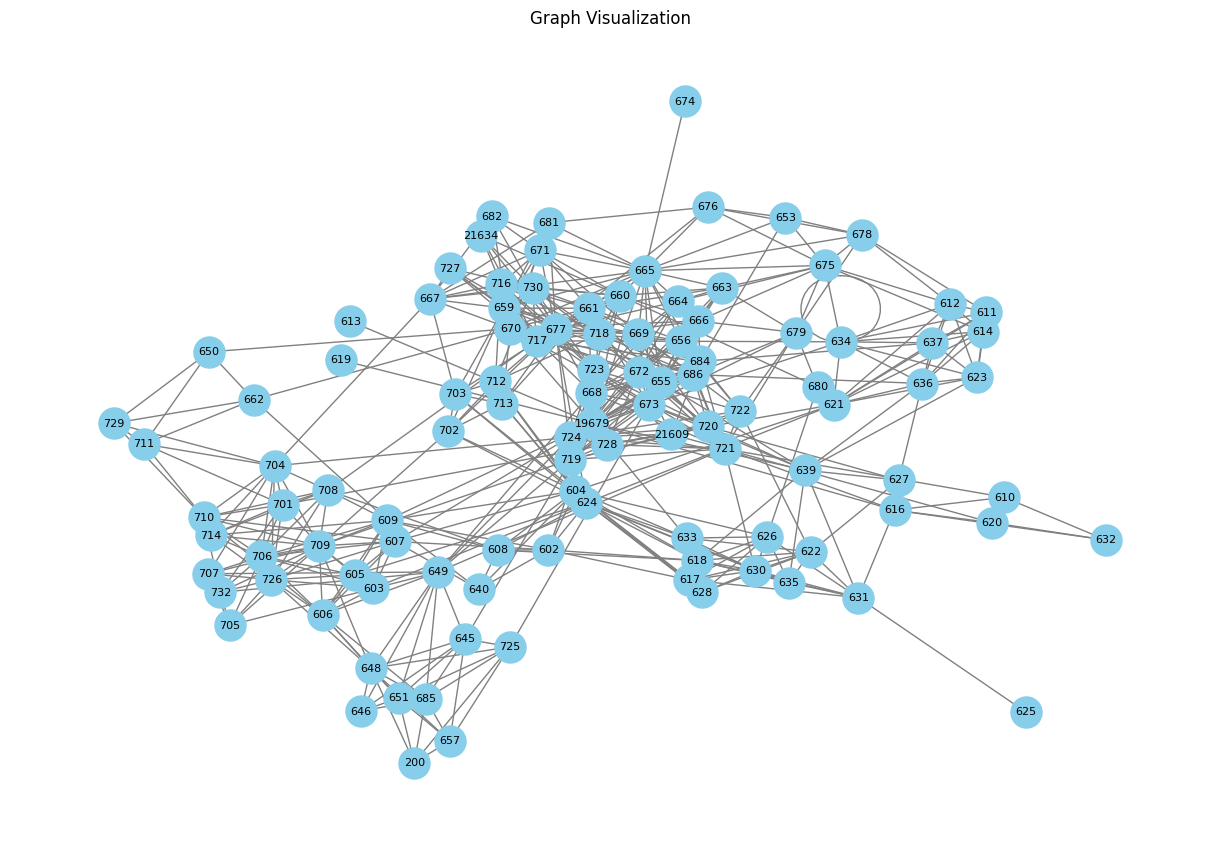

In [6]:

plt.figure(figsize=(12, 8))  # Set figure size
nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=8)

# Show the plot
plt.title("Graph Visualization")
plt.show()

In [7]:
if nx.is_connected(G):
    print("The graph is connected.")
else:
    print("The graph is disconnected.")

The graph is connected.


In [8]:
avg_degree = sum(dict(G.degree()).values()) / len(G.nodes())

# Average clustering coefficient
avg_clustering = nx.average_clustering(G)

#Average Path Length
avg_path_length = nx.average_shortest_path_length(G)

#Diameter
diameter = nx.diameter(G)


# Assortativity value
assortativity = nx.degree_assortativity_coefficient(G)

# Highest degree node
highest_degree_node = max(G.degree(), key=lambda x: x[1])

# Lowest degree node
lowest_degree_node = min(G.degree(), key=lambda x: x[1])

# Print results
print(f"Average Degree: {avg_degree}")
print(f"Average Clustering Coefficient: {avg_clustering}")
print(f"Average Path Length: {avg_path_length if avg_path_length else 'Graph is disconnected'}")
print(f"Diameter: {diameter if diameter else 'Graph is disconnected'}")
print(f"Assortativity: {assortativity}")
print(f"Highest Degree Node: {highest_degree_node[0]} with degree {highest_degree_node[1]}")
print(f"Lowest Degree Node: {lowest_degree_node[0]} with degree {lowest_degree_node[1]}")

Average Degree: 9.906542056074766
Average Clustering Coefficient: 0.523013306205595
Average Path Length: 2.6910597778169634
Diameter: 6
Assortativity: 0.07107249314102661
Highest Degree Node: 677 with degree 24
Lowest Degree Node: 625 with degree 1


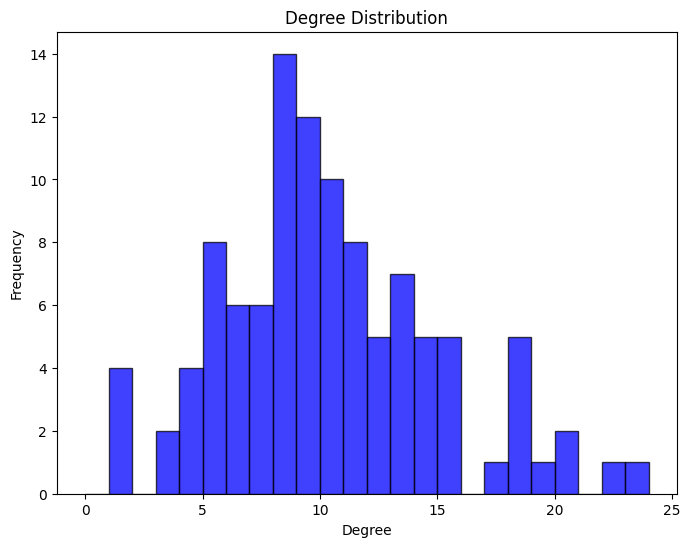

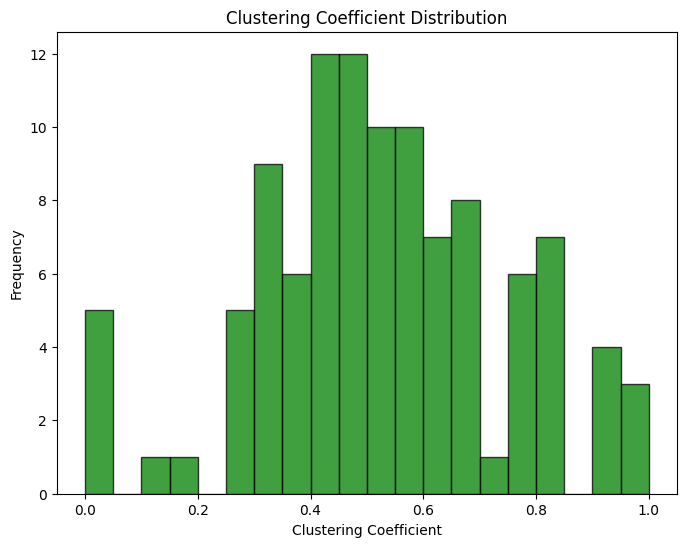

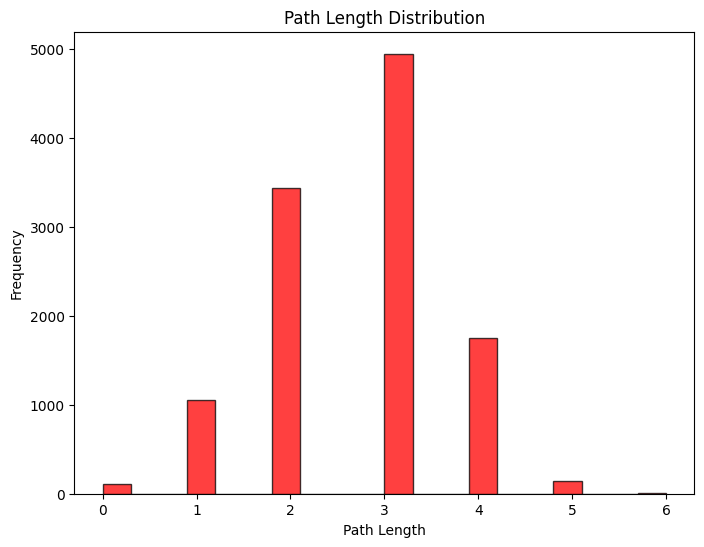

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Compute node degrees
degree_sequence = [deg for _, deg in G.degree()]

# Compute clustering coefficients
clustering_coeffs = list(nx.clustering(G).values())

# Compute shortest path lengths (only for connected graphs)
if nx.is_connected(G):
    path_lengths = dict(nx.shortest_path_length(G))
    all_lengths = [length for target_dict in path_lengths.values() for length in target_dict.values() if target_dict!=length]
else:
    all_lengths = []  # If graph is disconnected, we skip this plot

# Degree Distribution
plt.figure(figsize=(8, 6))
plt.hist(degree_sequence, bins=np.arange(0, max(degree_sequence) + 1, 1), alpha=0.75, color='b', edgecolor='black')
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution")
plt.show()

# Clustering Coefficient Distribution
plt.figure(figsize=(8, 6))
plt.hist(clustering_coeffs, bins=20, alpha=0.75, color='g', edgecolor='black')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.title("Clustering Coefficient Distribution")
plt.show()

# Path Length Distribution (only if graph is connected)
if all_lengths:
    plt.figure(figsize=(8, 6))
    plt.hist(all_lengths, bins=20, alpha=0.75, color='r', edgecolor='black')
    plt.xlabel("Path Length")
    plt.ylabel("Frequency")
    plt.title("Path Length Distribution")
    plt.show()


In [10]:

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

# Convert to DataFrame
centrality_df = pd.DataFrame({
    "Node": list(G.nodes),
    "Degree Centrality": degree_centrality.values(),
    "Closeness Centrality": closeness_centrality.values(),
    "Betweenness Centrality": betweenness_centrality.values(),
    "Eigenvector Centrality": eigenvector_centrality.values()
})

# Display results
print(centrality_df.sort_values(by="Degree Centrality", ascending=False).head(10))  # Top 10 nodes


      Node  Degree Centrality  Closeness Centrality  Betweenness Centrality  \
22     677           0.226415              0.460870                0.073121   
87     665           0.207547              0.454936                0.069057   
31     721           0.188679              0.458874                0.080647   
90     670           0.188679              0.447257                0.056670   
103  19679           0.179245              0.517073                0.164200   
27     624           0.169811              0.447257                0.068336   
88     684           0.169811              0.458874                0.040945   
57     673           0.169811              0.441667                0.047151   
5      709           0.169811              0.404580                0.040363   
66     672           0.169811              0.449153                0.018697   

     Eigenvector Centrality  
22                 0.228445  
87                 0.226448  
31                 0.195914  
90        

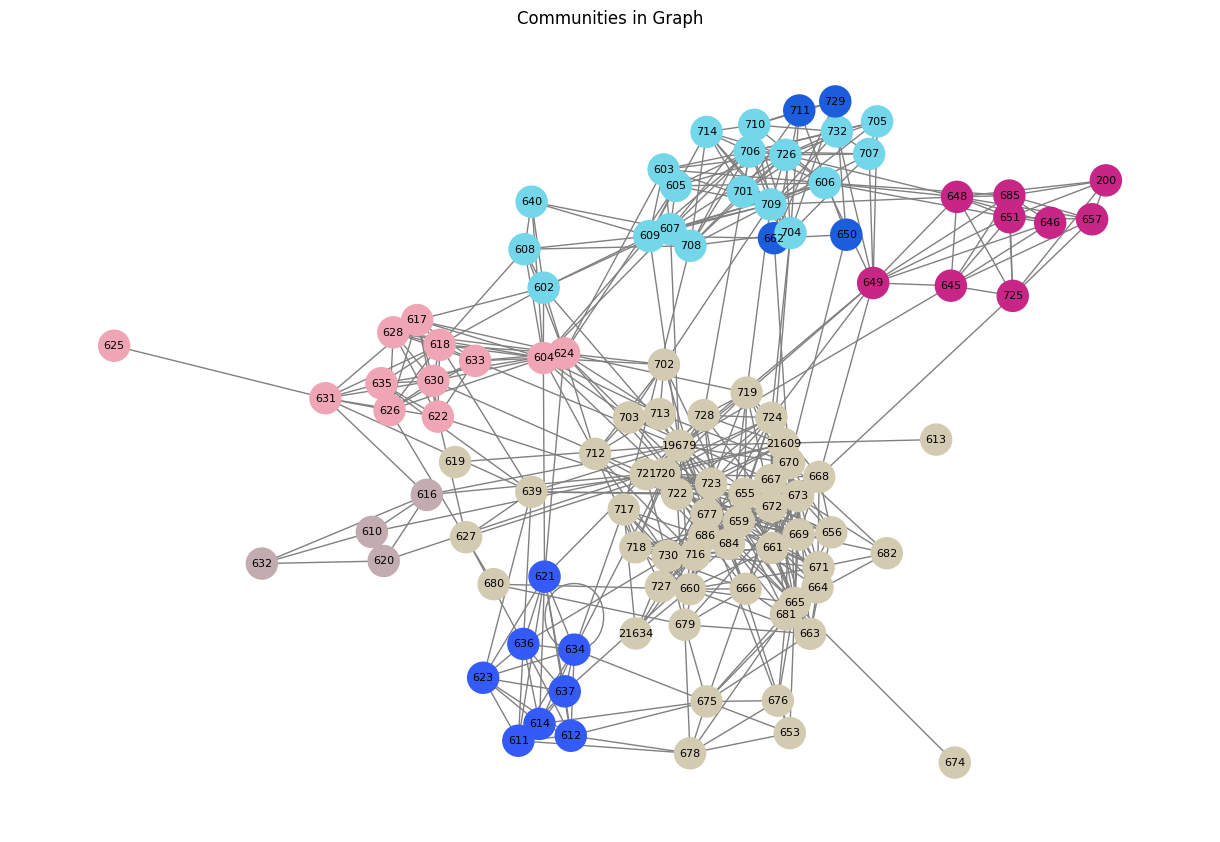

In [25]:
communities = list(nx.community.asyn_lpa_communities(G))

# Assign a unique color to each community
community_colors = {}
colors = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in range(len(communities))]

for idx, community in enumerate(communities):
    for node in community:
        community_colors[node] = colors[idx]

# Draw the graph with community colors
plt.figure(figsize=(12, 8))
node_colors = [community_colors[node] for node in G.nodes]
nx.draw(G, with_labels=True, node_color=node_colors, edge_color="gray", node_size=500, font_size=8)

plt.title("Communities in Graph")
plt.show()

In [ ]:
# Compute clustering coefficient
avg_clustering = nx.average_clustering(G)

# Compute average shortest path length (only for connected graphs)
if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
else:
    avg_path_length = None  # The graph is disconnected

# Generate a random graph for comparison (Erdős-Rényi model)
random_G = nx.erdos_renyi_graph(len(G.nodes), nx.density(G))

# Compute clustering coefficient & path length for the random graph
random_clustering = nx.average_clustering(random_G)
random_path_length = nx.average_shortest_path_length(random_G) if nx.is_connected(random_G) else None

# Print results
print(f"Graph Clustering Coefficient: {avg_clustering:.4f}")
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")
print(f"Graph Average Path Length: {avg_path_length}")
print(f"Random Graph Average Path Length: {random_path_length}")

# Determine if the graph is Small-World
if avg_clustering > random_clustering and avg_path_length and random_path_length:
    if avg_path_length <= random_path_length:
        print("✅ The graph exhibits Small-World properties.")
    else:
        print("❌ The graph does not exhibit Small-World properties.")
else:
    print("❌ The graph does not exhibit Small-World properties.")
    

Graph Clustering Coefficient: 0.5230
Random Graph Clustering Coefficient: 0.0850
Graph Average Path Length: 2.6910597778169634
Random Graph Average Path Length: 2.2362898959619115
❌ The graph does not exhibit Small-World properties.
